# **Tarefa 3.6 - Projeto 1 - Análise exploratória de dados** - Lucas Omar Andrade Leal

# I. Empregar ao máximo métodos de visualização gráfica estudados na [Unidade 3 - Análise Exploratória e Estatística Descritiva](https://pucminas.instructure.com/courses/92960/files/5519048?wrap=1) e outros que julgar pertinente;

In [ ]:
import io
import requests
import regex as re
import numpy as np
import pandas as pd  # MANIPULAR BASES DE DADOS
import seaborn as sns  # GRAPHICS GENERATION
from sklearn import metrics  # METHODS TO EVALUATE THE BEST AI TEST PERFORMANCE
import matplotlib.pyplot as plt  # GRAPHICS GENERATION
from IPython.display import display
from sklearn.linear_model import LinearRegression  # AI TRAINING TEST
from sklearn.ensemble import RandomForestRegressor  # AI TRAINING TEST
from sklearn.model_selection import train_test_split  # AI LIBRARY
import warnings
warnings.filterwarnings('ignore')

In [1]:
vgms_url = 'https://github.com/malegopc/DSBD/blob/main/Datasets/Video_games/venda_video_games.xlsx?raw=true'
vgms = requests.get(vgms_url).content
vgms_dataset = pd.read_excel(vgms)
df = pd.DataFrame(vgms_dataset)
df.head(10)

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16297 entries, 0 to 16296
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nome        16297 non-null  object 
 1   Plataforma  16297 non-null  object 
 2   Ano         16297 non-null  int64  
 3   Gênero      16297 non-null  object 
 4   Produtor    16261 non-null  object 
 5   NA          16297 non-null  float64
 6   EU          16297 non-null  float64
 7   JP          16297 non-null  float64
 8   RM          16297 non-null  float64
 9   Global      16297 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
df.shape

(16297, 10)

# II. Apresentar minimamente as seguintes análises ou informações:

1. Top 5 dos jogos mais vendidos (considerando todos os anos); (sugestão: df[' '].value_counts())

In [ ]:
df.groupby('Nome')['Global'].sum().sort_values(ascending=False)

Nome
Wii Sports                                       82.74
Grand Theft Auto V                               55.92
Super Mario Bros.                                45.31
Tetris                                           35.84
Mario Kart Wii                                   35.82
                                                 ...  
Satomi Hakkenden: Hachi Tamanoki                  0.01
Marginal #4: Idol of Supernova                    0.01
F.E.A.R. Perseus Mandate                          0.01
Scarlett: Nichijou no Kyoukaisen                  0.01
Naxat Soft Reachmania Vol. 1: CR Galaxy Angel     0.01
Name: Global, Length: 11346, dtype: float64

In [ ]:
df.nlargest(n=5, columns=['Global'])

,Nome,Plataforma,Ano,Gênero,Produtor,NA,EU,JP,RM,Global
6113,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


2. Mostrar a distribuição de frequências (contagem) de todos os gêneros de jogos. Você deve apresentar uma listagem em ordem decrescente (dos gêneros de jogos mais lançados até os menos lançados). Apresente também um gráfico de barras (ou histograma) da distribuição (contagem) dos gêneros em ordem decrescente; (sugestão: df[' '].value_counts()  e sns.countplot(...))

In [ ]:
df2 = df['Gênero'].value_counts().sort_values(ascending=False)
df2

Action          3249
Sports          2304
Misc            1710
Role-Playing    1469
Shooter         1282
Adventure       1253
Racing          1226
Platform         876
Simulation       850
Fighting         836
Strategy         671
Puzzle           571
Name: Gênero, dtype: int64

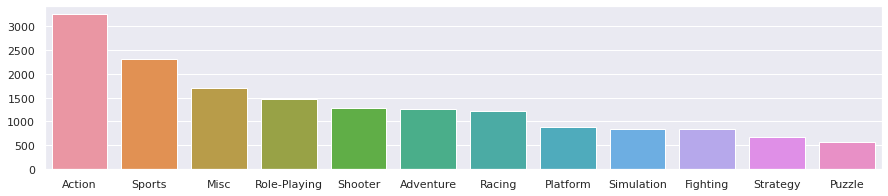

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})
types = df['Gênero'].value_counts().index # conta os tipos de valores que tem na coluna gênero
number = df['Gênero'].value_counts().values # conta a frequência dos valores da coluna gênero
sns.barplot(x=types, y=number)

3. Número de jogos lançados por ano (mostrar listagem numérica e gráfico);

In [ ]:
df3 = df['Ano'].value_counts().sort_values(ascending=False)
df3

2009    1429
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     652
2015     608
2014     578
2013     543
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: Ano, dtype: int64

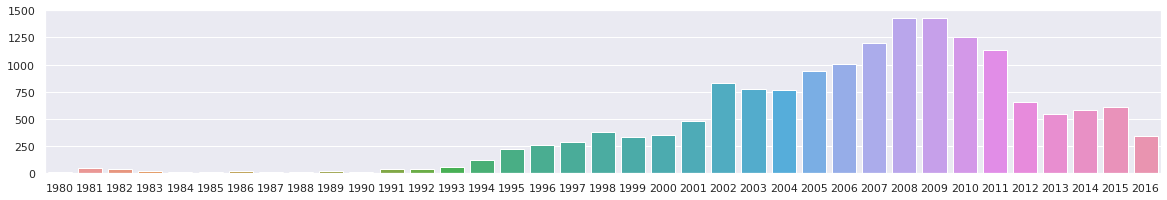

In [ ]:
ano = df['Ano'].value_counts().index # conta os tipos de valores que tem na coluna Ano
number = df['Ano'].value_counts().values # conta a frequência dos valores da coluna Ano

sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x=ano,y=number)

4. Volume de vendas globais por ano (mostrar listagem numérica e gráfico); (sugestão: df.groupby(by=['Ano'])['Global'].sum()


In [ ]:
df4 = df.groupby('Ano')['Global'].sum().sort_values(ascending=False)
df4

Ano
2008    678.90
2009    667.20
2007    611.12
2010    600.40
2006    521.04
2011    515.68
2005    459.94
2004    419.31
2002    395.52
2013    367.82
2012    363.25
2003    357.85
2014    336.81
2001    331.47
2015    264.24
1998    256.47
1999    251.27
2000    201.56
1997    200.98
1996    199.15
1995     88.11
1994     79.17
1992     76.16
1989     73.45
2016     70.93
1985     53.94
1984     50.36
1990     49.39
1988     47.22
1993     45.98
1986     37.07
1981     35.77
1991     32.23
1982     28.86
1987     21.74
1983     16.79
1980     11.38
Name: Global, dtype: float64

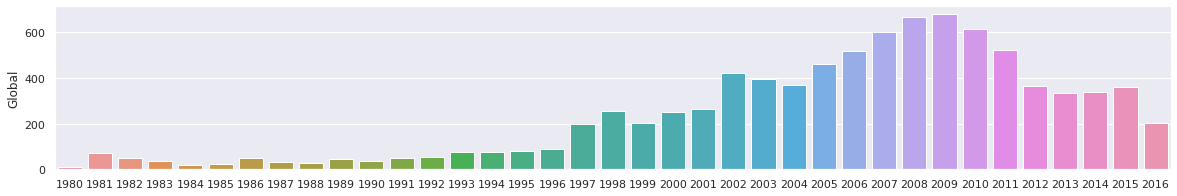

In [ ]:
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x=ano,y=df4)

5. Volume de vendas globais por gênero (mostrar listagem numérica e gráfico);

In [ ]:
df5 = df.groupby('Gênero')['Global'].sum().sort_values(ascending=False)
df5

Gênero
Action          1722.60
Sports          1309.24
Shooter         1026.20
Role-Playing     923.80
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       389.87
Puzzle           242.22
Adventure        233.58
Strategy         173.43
Name: Global, dtype: float64

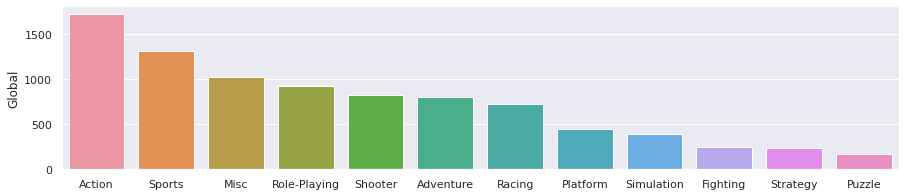

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})
genero = df['Gênero'].value_counts().index # conta os tipos de valores que tem na coluna Gênero
sns.barplot(x=genero,y=df5)

6. Mostrar a distribuição de frequências (contagem) de todas as plataformas de jogos. Da mesma forma que o item 2 (listagem e gráfico de barras).

In [ ]:
df6 = df['Plataforma'].value_counts().sort_values(ascending=False)
df6

DS      2132
PS2     2126
PS3     1298
Wii     1290
X360    1229
PSP     1193
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      403
PS4      333
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

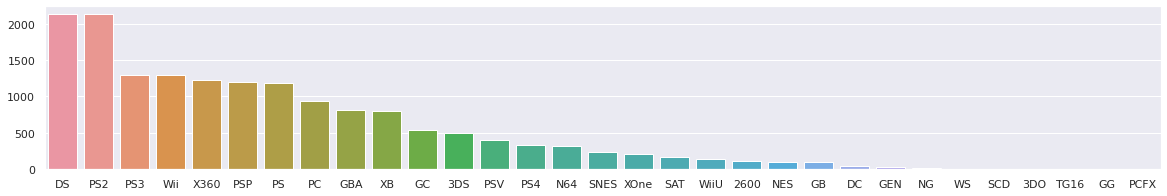

In [ ]:
sns.set(rc={'figure.figsize':(20,3)})
plat = df['Plataforma'].value_counts().index # conta os tipos de valores que tem na coluna Plataforma
sales = df['Plataforma'].value_counts().values # conta a frequência dos valores da coluna Plataforma
sns.barplot(x=plat, y=sales)

7. Volume de vendas globais por plataforma (mostrar listagem numérica e gráfico)

In [ ]:
df7 = df.groupby('Plataforma')['Global'].sum().sort_values(ascending=False)
df7

Plataforma
PS2     1233.45
X360     969.36
PS3      949.04
Wii      909.81
DS       818.67
PS       727.39
GBA      313.56
PSP      291.40
PS4      278.01
PC       255.05
GB       254.42
XB       252.09
NES      251.07
3DS      246.28
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.06
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global, dtype: float64

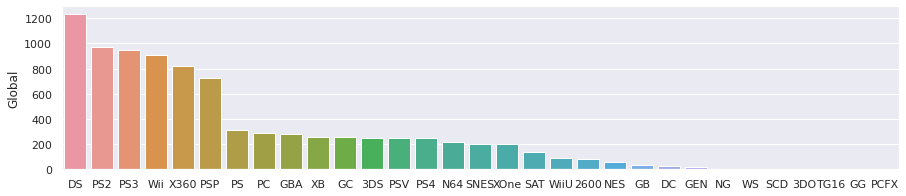

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})
plat = df['Plataforma'].value_counts().index # conta os tipos de valores que tem na coluna Plataforma
sns.barplot(x=plat,y=df7)

8. Top 10 das produtoras (pelo número de jogos)

Duvida.
> Ao selecionar os Nomes dos jogos agrupando-os pelos Produtores, há repetições de empresas onde as quais deveriam estar em um unico grupo.

> Ex: Electronic Arts aparecendo 3x na amostra abaixo.

> Como desconfiei dos dados, achei mais coerente a contagem do número de repetição das empresas por linha no dataframe. Uma vez que cada linha, mesmo que com o nome da empresa repetido, representa um jogo diferente.

In [ ]:
df8 = df.groupby('Produtor')['Nome'].value_counts().sort_values(ascending=False).head(10)
df8

Produtor                                Nome                       
Electronic Arts                         Need for Speed: Most Wanted    12
                                        FIFA 14                         9
THQ                                     Ratatouille                     9
Warner Bros. Interactive Entertainment  LEGO Marvel Super Heroes        9
Electronic Arts                         Madden NFL 08                   8
Warner Bros. Interactive Entertainment  LEGO Jurassic World             8
Electronic Arts                         Madden NFL 07                   8
                                        FIFA Soccer 13                  8
                                        FIFA 15                         8
THQ                                     Cars                            8
Name: Nome, dtype: int64

In [ ]:
df8 = df.groupby(['Produtor']).size().sort_values(ascending=False).head(10)
df8

Produtor
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
dtype: int64

9. Mostrar a proporção de venda de cada região (NA, EU, JP, RM) no total da venda global (mostrar por meio de um pie chart);


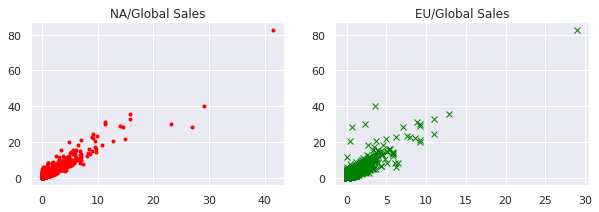

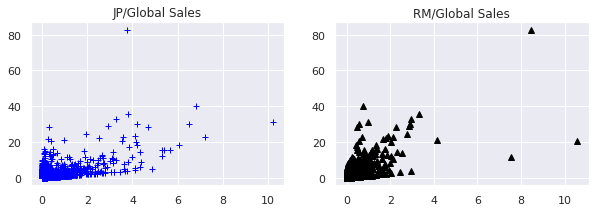

In [ ]:
df_co = df[['NA', 'EU', 'RM', 'JP', 'Global']]
sns.set(rc={'figure.figsize':(10,3)})

plt.subplot(1,2,1)
x = df_co[["NA"]]
y = df_co[["Global"]]
plt.title('NA/Global Sales')
plt.plot(x, y, '.', color='red');

plt.subplot(1,2,2)
x = df_co[["EU"]]
plt.title('EU/Global Sales')
plt.plot(x, y, 'x', color='green');
plt.show()

plt.subplot(1,2,1)
x = df_co[["JP"]]
plt.title('JP/Global Sales')
plt.plot(x, y, '+', color='blue');

plt.subplot(1,2,2)
x = df_co[["RM"]]
plt.title('RM/Global Sales')
plt.plot(x, y, '^', color='black');
plt.show()

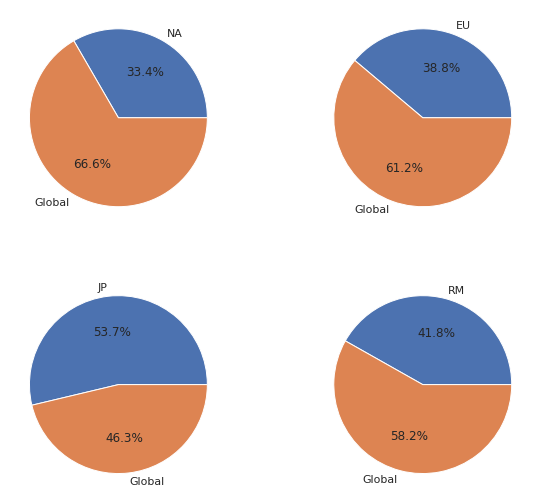

In [ ]:
sns.set(rc={'figure.figsize':(10,9)})

index = df['Global'].sum()
df9_na = df[df.NA==0].count()[0]
df9_eu = df[df.EU==0].count()[0]
df9_jp = df[df.JP==0].count()[0]
df9_rm = df[df.RM==0].count()[0]
fig1, ax1 = plt.subplots()

ax1 = plt.subplot2grid((2,2), (0, 0))
labels = 'NA', 'Global'
data = [df9_na, index] 
ax1.pie(data, labels=labels, autopct='%1.1f%%')

ax1 = plt.subplot2grid((2,2), (0, 1))
labels = 'EU', 'Global'
data = [df9_eu, index] 
ax1.pie(data, labels=labels, autopct='%1.1f%%')

ax1 = plt.subplot2grid((2,2), (1, 0))
labels = 'JP', 'Global'
data = [df9_jp, index] 
ax1.pie(data, labels=labels, autopct='%1.1f%%')

ax1 = plt.subplot2grid((2,2), (1, 1))
labels = 'RM', 'Global'
data = [df9_rm, index] 
ax1.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

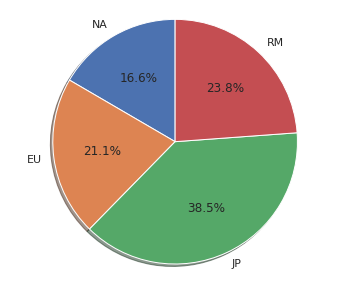

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})

index = len(df.index)
prop_NA = (df[df.NA==0].count()[0]/index)*100
prop_EU = (df[df.EU==0].count()[0]/index)*100
prop_JP = (df[df.JP==0].count()[0]/index)*100
prop_RM = (df[df.RM==0].count()[0]/index)*100

labels = 'NA', 'EU', 'JP','RM'
sizes = [prop_NA, prop_EU, prop_JP, prop_RM] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

10. Correlação de vendas entre NA, EU, JP, RM e Global (mostrar matriz de correlação e mapa de calor)

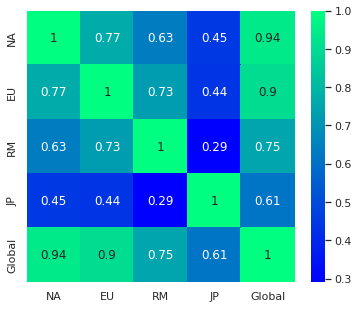

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df_co.corr(), cmap="winter", annot=True)
plt.show()

11. Comparar o volume de vendas por ano das plataformas Xbox One e PS4 (mostre por meio de um gráfico de barras); (sugestão: 
sns.barplot(x = 'Ano',y = 'Global', hue = 'Plataforma'...)

In [ ]:
df_mask = df['Plataforma'] == 'PS4'
ps4 = df[df_mask]
ps4[['Plataforma', 'Ano', 'Global']]
ps4_sales = ps4.groupby('Ano')['Global'].sum().sort_values(ascending=False)

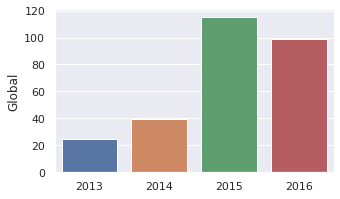

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
anops4 = ps4['Ano'].value_counts().index # conta os tipos de valores que tem na coluna Ano
sns.barplot(x=anops4,y =ps4_sales)

In [ ]:
df_mask = df['Plataforma'] == 'XOne'
xbox = df[df_mask]
xbox[['Plataforma', 'Ano', 'Global']]
xbox_sales = xbox.groupby('Ano')['Global'].sum().sort_values(ascending=False)

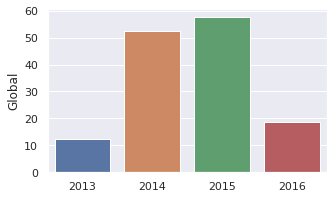

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
anoxbox = xbox['Ano'].value_counts().index # conta os tipos de valores que tem na coluna Ano
sns.barplot(x=anoxbox,y=xbox_sales)

12. Mostrar por meio de boxplots o grau de dispersão em cada ano das vendas globais das plataformas Xbox One e PS4 (mostrar num mesmo plot); (sugestão: sns.boxplot(x='Plataforma', y='Global', hue = 'Ano'...)

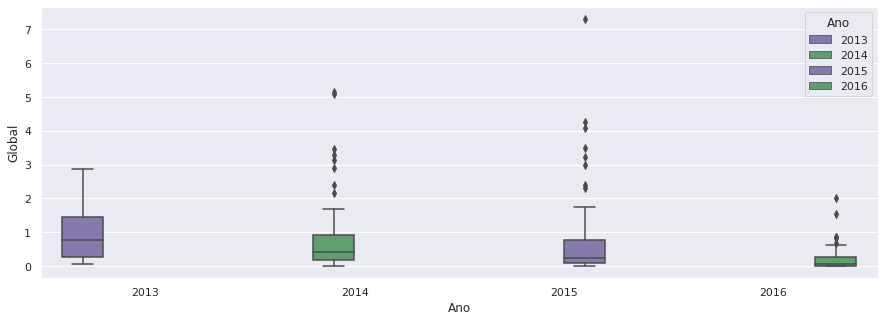

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x="Ano", y="Global", hue="Ano", palette=["m", "g"],data=xbox)

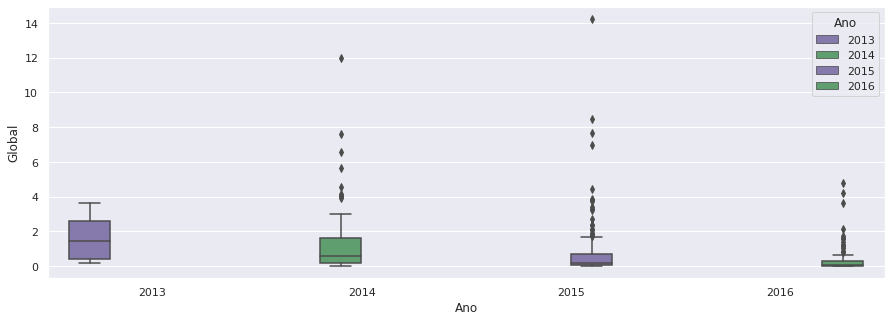

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x="Ano", y="Global", hue="Ano", palette=["m", "g"],data=ps4)

# III. Apresentar outras análises. DATAFRAME UFC

In [ ]:
# All professional MMA bouts in the UFC, Bellator, and OneFC as of 11 Aug, 21.
all_pro_fgts = 'https://raw.githubusercontent.com/lucasoal/datasets/main/dsbd-Tarefa_3_6_All%20Pro%20MMA%20Fights%20-%20UFC%2C%20Bellator%2C%20One.csv' 
fgts = requests.get(all_pro_fgts).content
df_fgts = pd.read_csv(io.StringIO(fgts.decode('utf-8')))

# Processamento de DATAFRAMES
df_fgts.drop(["url", "fighter1_url", "fighter2_url"], axis=1, inplace=True)
df_fgts.set_index('event_title')
df_fgts.head(1)

,event_title,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),"Aug 7, 2021","Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11


In [ ]:
# All MMA fighters ever fighting in the UFC, Bellator, and OneFC as of 11 Aug, 21.
all_pro_fgtrs = 'https://raw.githubusercontent.com/lucasoal/datasets/main/dsbd-Tarefa_3_6_All%20Pro%20MMA%20Fighters%20-%20UFC%2C%20Bellator%2C%20One.csv'
fgtrs = requests.get(all_pro_fgtrs).content
df_fgtrs = pd.read_csv(io.StringIO(fgtrs.decode('utf-8')))

# REMOVE AS COLUNAS URL, NICKNAME, BIRTH, DEATH, LOCATION E OTHER WINS
# NA COLUNA WEIGHT, FAZ O REPLACE DE ' lbs' PARA PODER TRANSFORMAR ELA EM NUMERIC E CONVERTER DE Lbs PARA Kg (lbs * 0.453592)
# ARREDONDA O VALOR FLUTUANTE EM 2 CASAS
df_fgtrs.drop(["url", "nickname", "birth_date", "death_date", "location", "wins_other", "losses_other"], axis=1, inplace=True)
df_fgtrs['weight'] = df_fgtrs['weight'].str.replace(' lbs','')
df_fgtrs['weight'] = round(((pd.to_numeric(df_fgtrs['weight'])) * 0.453592), 2)

df_fgtrs

,fighter_name,age,country,height,weight,association,weight_class,wins,wins_ko,wins_submission,wins_decision,lossess,losses_ko,losses_submission,losses_decision
0,Kharun Atlangeriev,28.0,Russia,"5'10""",70.31,OFS Team,Lightweight,11,5,5,1,11,0,1,1
1,Shojin Miki,NaN,United States,"5'9""",56.70,HMC Academy,Flyweight,6,2,4,0,6,2,0,5
2,Ryan Keenan,36.0,United States,"6'0""",70.31,Gracie Orlando,Lightweight,6,3,3,0,6,1,1,0
3,Dustin Jacoby,33.0,United States,"6'4""",92.99,Factory X,Light Heavyweight,14,9,1,4,14,1,2,2
4,Richardson Moreira,37.0,Brazil,"6'2""",92.99,Team Nogueira,Light Heavyweight,8,2,5,1,8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,Bas Rutten,56.0,Netherlands,"6'1""",92.99,NaN,Light Heavyweight,28,11,14,4,28,0,3,1
5147,Jason Dent,41.0,United States,"5'10""",71.67,GriffonRawl Thaiboxing & MMA Academy,Welterweight,22,3,19,0,22,2,2,9
5148,Carlos Felipe,26.0,Brazil,"6'0""",119.29,Life MMA,Heavyweight,11,6,0,5,11,0,0,1
5149,Kyle Crutchmer,28.0,United States,"5'8""",77.11,American Kickboxing Academy,Welterweight,7,1,3,3,7,0,0,1


In [ ]:
# All MMA fighters ever fighting in the UFC, Bellator, and OneFC as of 11 Aug, 21.
all_pro_fgtrs = 'https://raw.githubusercontent.com/lucasoal/datasets/main/dsbd-Tarefa_3_6_All%20Pro%20MMA%20Fighters%20-%20UFC%2C%20Bellator%2C%20One.csv'
fgtrs = requests.get(all_pro_fgtrs).content
df_fgtrs = pd.read_csv(io.StringIO(fgtrs.decode('utf-8')))

# REMOVE AS COLUNAS URL, NICKNAME, BIRTH, DEATH, LOCATION E OTHER WINS
# NA COLUNA WEIGHT, FAZ O REPLACE DE ' lbs' PARA PODER TRANSFORMAR ELA EM NUMERIC E CONVERTER DE Lbs PARA Kg (lbs * 0.453592)
# ARREDONDA O VALOR FLUTUANTE EM 2 CASAS
df_fgtrs.drop(["url", "nickname", "birth_date", "death_date", "location", "wins_other", "losses_other"], axis=1, inplace=True)
df_fgtrs['weight'] = df_fgtrs['weight'].str.replace(' lbs','')
df_fgtrs['weight'] = round(((pd.to_numeric(df_fgtrs['weight'])) * 0.453592), 2)

# TRANSFORMA NA COLUNA HEIGHT, A ALTURA EM FEETS PARA METROS
#   5' = 5 pés; 10" = 10 polegadas
#   pes -> m = pes/3,281; polegadas -> cm = pol/39,37

# USA UMA EXPRESSÃO REGULAR COM A BIBLIOTECA REGEX -> exp_reg = re.compile(r"([0-9]+)'([0-9]*)''")
# ACEITA VALORES DE 1 A 9 SEGUIDOS POR APÓSTROFO -> ([0-9]+)' 
# SEGUIDO POR QUAISQUER VALORES DE 1 A 9 SEGUIDOS POR 2 APÓSTROFOS -> ([0-9]*)''
# A FUNÇÃO inches_to_m RECEBE O VALOR DA CÉLULA E APLICA A CADA GRUPO DA EXPRESSÃO, A FÓRMULA PARA TRANSFORMAR OS VALORES
df_fgtrs['height'] = df_fgtrs['height'].str.replace('"',"''")
exp_reg = re.compile(r"([0-9]+)'([0-9]*)''")
def inches_to_m(inches):
    m = exp_reg.match(inches)
    if m == None:
        return float('NaN')
    else:
        return round((float(m.group(1))/3.281 + float(m.group(2))/39.37),2)

df_fgtrs["height"] = df_fgtrs["height"].apply(inches_to_m)

df_fgtrs.head(1)

,fighter_name,age,country,height,weight,association,weight_class,wins,wins_ko,wins_submission,wins_decision,lossess,losses_ko,losses_submission,losses_decision
0,Kharun Atlangeriev,28.0,Russia,1.78,70.31,OFS Team,Lightweight,11,5,5,1,11,0,1,1


In [ ]:
# All MMA fighters ever fighting in the UFC, Bellator, and OneFC as of 11 Aug, 21.
all_ufc_fgtrs = 'https://raw.githubusercontent.com/lucasoal/datasets/main/UFC%20Roster%20DataStatistics.csv'
ufc_fgtrs = requests.get(all_ufc_fgtrs).content
df_ufc_fgtrs = pd.read_csv(io.StringIO(ufc_fgtrs.decode('utf-8')))
df_ufc_fgtrs.drop_duplicates()
df_ufc_fgtrs

,ranking,name,age,weight,gender,height,ufc_wins,ufc_loses,ufc_draws,ufc_no_contests,mma_wins,mma_loses,mma_draws,mma_no_contests
0,C,Brandon Moreno,27,125,Male,67,8,2,2.0,NaN,19.0,5.0,2.0,NaN
1,1,Deiveson Figueiredo,33,125,Male,65,9,2,1.0,NaN,20.0,2.0,1.0,NaN
2,2,Askar Askarov,29,125,Male,65,3,0,1.0,NaN,14.0,0.0,1.0,NaN
3,3,Alexandre Pantoja,31,125,Male,65,8,3,NaN,NaN,24.0,5.0,NaN,NaN
4,4,Alex Perez,29,125,Male,64,6,2,NaN,NaN,24.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,Luana Pinheiro,28,115,Female,62,1,0,NaN,NaN,9.0,1.0,NaN,NaN
613,NaN,Tabatha Ricci,26,115,Female,61,1,1,NaN,NaN,6.0,1.0,NaN,NaN
614,NaN,Silvana Gomez Juarez,36,115,Female,63,0,1,NaN,NaN,10.0,3.0,NaN,NaN
615,NaN,Istela Nunes,29,115,Female,64,0,1,NaN,NaN,6.0,2.0,NaN,1.0


1. Top 5 dos lutadores com mais vitórias (considerando todos do UFC); (sugestão: df[' '].value_counts())

In [ ]:
# top5_fgtrs = df_fgtrs.nlargest(5, 'wins')
# top5_fgtrs.head(5)
df_mask = df_ufc_fgtrs['ranking'] == 'C'
champions = df_ufc_fgtrs[df_mask]
champions[['name', 'mma_wins', 'mma_loses', 'mma_draws']].sort_values(by=['mma_wins'], ascending=False).head(5)

,name,mma_wins,mma_loses,mma_draws
96,Glover Teixeira,33.0,7.0,NaN
48,Charles Oliveira,31.0,8.0,NaN
32,Alexander Volkanovski,23.0,1.0,NaN
144,Valentina Shevchenko,22.0,3.0,NaN
80,Israel Adesanya,21.0,1.0,NaN


In [ ]:
# top5_fgtrs = df_fgtrs.nlargest(5, 'wins')
# top5_fgtrs.head(5)
top_wins_fgtrs = df_ufc_fgtrs.sort_values(by='ufc_wins', ascending=False)
top_wins_fgtrs.nlargest(617 , 'ufc_wins')[['name','ranking','ufc_wins']]

,name,ranking,ufc_wins
283,Donald Cerrone,NaN,29
342,Jim Miller,NaN,22
177,Andrei Arlovski,NaN,21
49,Dustin Poirier,1,21
206,Jon Jones,NaN,20
...,...,...,...
522,Gaetano Pirrello,NaN,0
518,Kevin Natividad,NaN,0
517,Mark Striegl,NaN,0
516,Cameron Else,NaN,0


2. Mostrar a distribuição de frequências de vitórias (contagem) de todos os campeões. Você deve apresentar uma listagem em ordem decrescente (dos maiores números de vitórias aos menores). Apresente também um gráfico de barras (ou histograma) da distribuição (contagem) de vitórias em ordem decrescente; (sugestão: df[' '].value_counts() e sns.countplot(...))

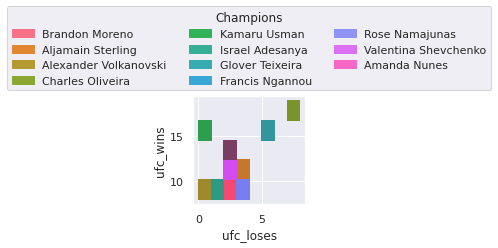

In [ ]:
sns.set(rc={'figure.figsize':(2,2)})
hist = sns.histplot(data=champions, x="ufc_loses", y="ufc_wins", hue="name")
sns.move_legend(hist, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Champions', frameon=True)

In [ ]:
top5champ =  champions[['name', 'mma_wins', 'mma_loses', 'mma_draws']].sort_values(by=['mma_wins'], ascending=False)
top5champ["xp"] = top5champ.sum(axis=1)
top5champ

,name,mma_wins,mma_loses,mma_draws,xp
96,Glover Teixeira,33.0,7.0,NaN,40.0
48,Charles Oliveira,31.0,8.0,NaN,39.0
32,Alexander Volkanovski,23.0,1.0,NaN,24.0
144,Valentina Shevchenko,22.0,3.0,NaN,25.0
80,Israel Adesanya,21.0,1.0,NaN,22.0
160,Amanda Nunes,21.0,4.0,NaN,25.0
161,Amanda Nunes,21.0,4.0,NaN,25.0
16,Aljamain Sterling,20.0,3.0,NaN,23.0
64,Kamaru Usman,20.0,1.0,NaN,21.0
0,Brandon Moreno,19.0,5.0,2.0,26.0


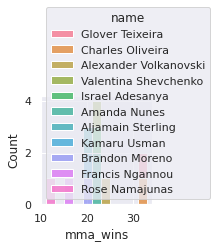

In [ ]:
sns.histplot(data=top5champ, x="mma_wins", hue="name", multiple="stack")


RELAÇÃO DE VITÓRIAS E EXPERIÊNCIA DE LUTA

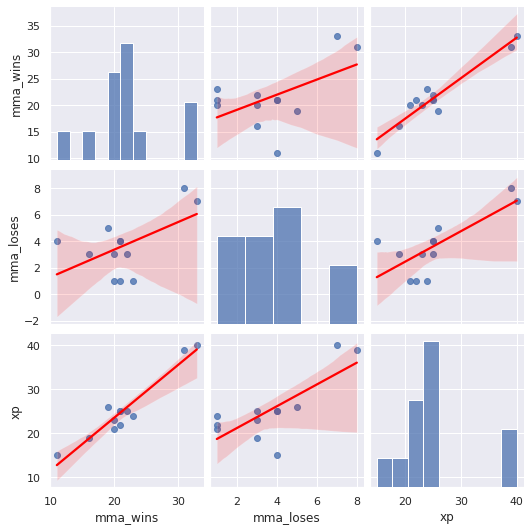

In [ ]:
dfxp = top5champ[['mma_wins','mma_loses', 'xp']]
dfxp

sns.set(rc={'figure.figsize':(6,5)})
sns.pairplot(dfxp, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

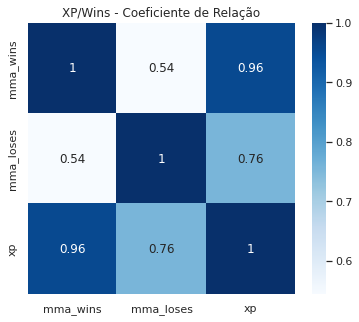

In [ ]:
plt.title('XP/Wins - Coeficiente de Relação')
sns.heatmap(dfxp.corr(), cmap="Blues", annot=True)
plt.show()

3. Histograma do número de eventos por ano;

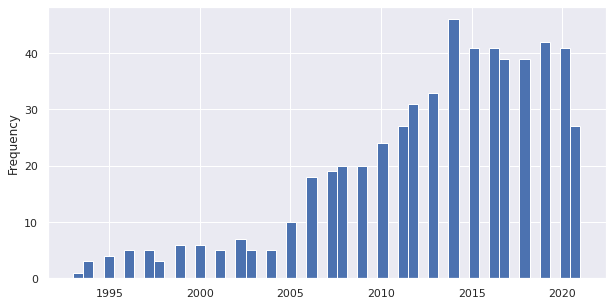

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})

all_events = df_fgts.drop_duplicates(subset=['event_title'])
ufc_events = all_events[all_events.event_title.str.contains("UFC", regex=False)]

# Aug 7, 2021
exp_reg = re.compile(r"([A-z]+) ([0-9]*), ([0-9]*)")
def date(i):
    mx = exp_reg.match(i)
    if mx == None:
        return float('NaN')
    else:
        return mx.group(3)

ufc_events["date"] = ufc_events["date"].apply(date)
ufc_events["date"] = pd.to_numeric(ufc_events["date"])

histogram = ufc_events["date"].plot.hist(bins= 50)
plt.show()

In [ ]:
ufc_events.head(1)

,event_title,organisation,date,location,match_nr,fighter1_name,fighter2_name,fighter1_result,fighter2_result,win_method,win_details,referee,round,time
0,UFC 265 - Lewis vs. Gane,Ultimate Fighting Championship (UFC),2021,"Toyota Center, Houston, Texas, United States",13,Ciryl Gane,Derrick Lewis,win,loss,TKO,Punches,Dan Miragliotta,3,4:11


In [ ]:
ufc_events.head()
occur = ufc_events.groupby(['date']).size().sort_values(ascending=False)
occur.head()

date
2014    46
2019    42
2020    41
2016    41
2015    41
dtype: int64

In [ ]:
occur.tail()

date
1996    5
1995    4
1994    3
1998    3
1993    1
dtype: int64

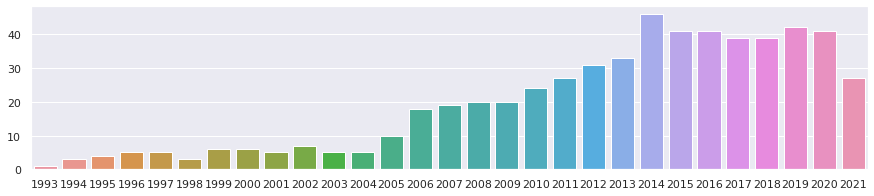

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})
plat = ufc_events['date'].value_counts().index # conta os tipos de valores que tem na coluna Plataforma
sns.barplot(x=plat,y=occur)